In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Load the data
fnn_data = pd.read_csv("FNN_predictions.csv")
kan_data = pd.read_csv("KAN_eqn_predictions.csv")

# Extract true values and predictions
true_values = fnn_data.iloc[:, 8].to_numpy()  # 7th column (index 6) for true values
fnn_predictions = fnn_data.iloc[:, 9].to_numpy()  # 8th column (index 7) for FNN predictions
kan_predictions = kan_data.iloc[:, 12].to_numpy()  # 8th column (index 7) for KAN predictions

In [20]:
# Interleave FNN and KAN predictions with true values
interleaved_true_values = np.empty((true_values.shape[0] * 2,), dtype=true_values.dtype)
interleaved_predictions = np.empty((true_values.shape[0] * 2,), dtype=true_values.dtype)
colors = []  # List to store colors for the scatter plot

# Fill in the interleaved arrays and assign colors
interleaved_true_values[::2] = true_values  # Place true values at even indices
interleaved_true_values[1::2] = true_values  # Place true values at odd indices
interleaved_predictions[::2] = fnn_predictions  # Place FNN predictions at even indices
interleaved_predictions[1::2] = kan_predictions  # Place KAN predictions at odd indices

# Assign colors: blue for FNN, red for KAN
colors = ['blue' if i % 2 == 0 else 'red' for i in range(interleaved_predictions.shape[0])]

Plot saved as diagonal_validation_plot_HTGR.png


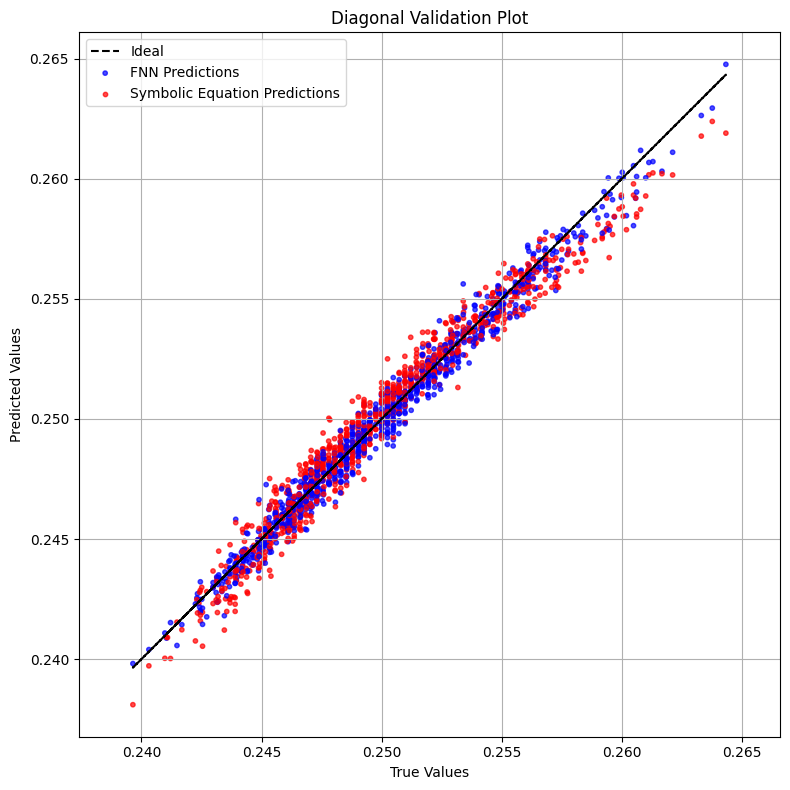

In [21]:
# Create the diagonal validation plot
plt.figure(figsize=(8, 8))
plt.plot(true_values, true_values, color='black', linestyle='--', label='Ideal')  # Diagonal line

# Scatter plot for alternating FNN and KAN predictions with colors
scatter = plt.scatter(interleaved_true_values, interleaved_predictions, c=colors, alpha=0.7, s=10)
plt.scatter([interleaved_true_values[1]], [interleaved_predictions[1]], color='red', alpha=0.7, s=10, label='KAN Predictions')
# Customize the plot
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Diagonal Validation Plot")
plt.legend(['Ideal', 'FNN Predictions', 'Symbolic Equation Predictions'], loc='best')
plt.grid(True)
plt.axis("equal")  # Ensure the axes are scaled equally
plt.tight_layout()

# Save the plot
output_plot = "diagonal_validation_plot_HTGR.png"
plt.savefig(output_plot, dpi=300)
print(f"Plot saved as {output_plot}")

# Show the plot
plt.show()